# Fetching datasets

We have several templates, parcellations, and datasets integrated in `NiSpace`.  
These can be accessed through functions named `nispace.datasets.fetch_...()`. On first access, data should should be downloaded to the user's home directory into a folder called `nispace-data`. The user can however provide a custom data folder via the argument `nispace_data_dir` available for every `fetch_` method.

## Fetch reference datasets

We start with the reference datasets as these are most important for you.  
With "reference data", we refer to brain maps that are ususally used to compare a certain (set of) target map(s) to. The main reference maps are nuclear imaging maps (`pet`), mRNA expression maps from the Allen Human Brain Atlas (`mrna`), and meta-analytic maps for behavioral domains obtained from the BrainMap database (`brainmap`).
Later, we will run systematic comparisons of user-defined target maps with with these reference maps, for example to answer the question if a group-comparison map (like a SPM t-map) spatially correlates ("colocalizes") with certain neurotransmitter receptors.

We can fetch our reference data with: `nispace.datasets.fetch_reference(...)`.  

- The first and only mandatory argument determines the reference dataset (e.g., `pet` or `mrna`).  
- The second argument is used to subset the datasets; it can be a part of a name or, for the `pet` dataset, a dict with detailed sub-setting information (see below).  
- The argument `parcellation` will cause the data to be returned in parcellated format as a pandas DataFrame. See below for included parcellations.  
- The argument `collection` can be a name of a map subset shipped with the toolbox. Very relevant for `pet` data, as we have many maps targeting the same transmitter receptor, and more so for `mrna` data, as we ship the toolbox with, e.g., pre-defined cell-type marker gene sets.

When fetching datasets, the function will by default print detailed information on the sources of each dataset. **The user is responsible for citing these sources when used in publications!**


In [1]:
from nispace.datasets import fetch_reference

### Nuclear imaging (`"pet"`)

Collections include:

- `"All"`: all maps  
- `"AllTargetSets"`: all maps, but sorted in sets by tracer target. If called without a parcellation, this will not have an influence. If called with a parcellation, i.e. returned as a table, it will have a 3-dimensional "multi"-index, with "sets" in the first, "map" in the second, and "weight" (= number of subjects) in the third place.  
- `"UniqueTracers"`: one pre-selected map for each target. When called with a parcellation, returned as table with a 2d-index, sorting the maps into sets by target groups (e.g., "Dopamine", or "Serotonin").  
- `"UniqueTracerSets"`: one or more maps for each target, given they have the same tracer. If parcellation is provided, the output table is indexed as for "AllTargetSets".

In many instances, `"UniqueTracers"` will be a good choice. 

In [2]:
# Get all pet maps as paths to volumes
print("All pet maps")
pet_maps = fetch_reference("pet")
print("Number of pet maps:", len(pet_maps))
print("First map path:", pet_maps[0])

All pet maps
INFO | 02/10/24 11:07:55 | nispace: Loading pet maps.
The NiSpace "PET" dataset is based on openly available nuclear imaging maps largely accessed via neuromaps 
(https://neuromaps-main.readthedocs.io/). The maps are downloaded via neuromaps, processed on-the-fly, and cached locally 
(find them in `~HOME/nispace-data/reference/pet/map`). The accompanying metadata table contains detailed information about 
tracers, source samples, original publications and data sources, as well as the publication licenses. Every map should be 
cited when used. The responsibility for this lies with the user! We additionally ask to cite:
- Markello et al., 2022 (https://doi.org/10.1038/s41592-022-01625-w)
- Hansen et al., 2022 (https://doi.org/10.1038/s41593-022-01186-3)
- Dukart et al., 2021 (https://doi.org/10.1002/hbm.25244)

- target-5HT1a_tracer-cumi101_n-8_dx-hc_pub-beliveau2017_space-mni152         Source: Beliveau2017       CC BY-NC-SA 4.0  https://doi.org/10.1523/JNEUROSCI.2830-16.20

This command returned the paths to all maps and printed citation information. We can turn off the latter with the ´print_references` argument.  
This is how we get a single specific map:

In [3]:
# Get a single map based on the exact name
print("Get a single map (path to volume)")
pet_maps = fetch_reference(
    "pet", 
    maps="target-5HT1a_tracer-cumi101_n-8_dx-hc_pub-beliveau2017",
    print_references=False
)
print("Filtered map path:", pet_maps)

Get a single map (path to volume)
INFO | 02/10/24 11:07:58 | nispace: Loading pet maps.
INFO | 02/10/24 11:07:58 | nispace: Applying filter: target-5HT1a_tracer-cumi101_n-8_dx-hc_pub-beliveau2017
INFO | 02/10/24 11:07:58 | nispace: Filtered from 46 to 1 maps.
Filtered map path: [PosixPath('/Users/llotter/nispace-data/reference/pet/map/target-5HT1a_tracer-cumi101_n-8_dx-hc_pub-beliveau2017_space-mni152.nii.gz')]


We have more options for sub-setting the `pet` collection, e.g.:

In [4]:
# Subset maps based on sub-string
print("Maps containing '5HT'")
pet_maps = fetch_reference(
    "pet", 
    maps="5HT", 
    print_references=False
)
print("Number of maps:", len(pet_maps))
print()

# Subset maps based on detail dict
print("Maps containing `5HT` or 'GABA' with a sample sizes over 30")
pet_maps = fetch_reference(
    "pet", 
    maps={"target": ["5HT", "GABA"], "n":">30"},
    print_references=False
)
print("Number of maps:", len(pet_maps))


Maps containing '5HT'
INFO | 02/10/24 11:08:01 | nispace: Loading pet maps.
INFO | 02/10/24 11:08:01 | nispace: Applying filter: 5HT
INFO | 02/10/24 11:08:01 | nispace: Filtered from 46 to 12 maps.
Number of maps: 12

Maps containing `5HT` or 'GABA' with a sample sizes over 30
INFO | 02/10/24 11:08:01 | nispace: Loading pet maps.
INFO | 02/10/24 11:08:01 | nispace: Applying filter: {'target': ['5HT', 'GABA'], 'n': '>30'}
INFO | 02/10/24 11:08:01 | nispace: Filtered from 46 to 5 maps.
Number of maps: 5


If we pass a parcellation (see below for the available ones), we will get the data already parcellated as a pandas DataFrame.

In [5]:
# Get all pet maps as table
print("All pet maps as table")
pet_tab = fetch_reference(
    "pet", 
    parcellation="Destrieux",
    print_references=False
)
print(pet_tab.shape) # pet maps x 148 parcels
display(pet_tab.head(5))

All pet maps as table
INFO | 02/10/24 11:08:03 | nispace: Loading pet maps.
INFO | 02/10/24 11:08:03 | nispace: Loading parcellated data: Destrieux
INFO | 02/10/24 11:08:03 | nispace: Standardizing parcellated data.
(46, 148)


,1_LH_CX_G_and_S_frontomargin,2_LH_CX_G_and_S_occipital_inf,3_LH_CX_G_and_S_paracentral,4_LH_CX_G_and_S_subcentral,5_LH_CX_G_and_S_transv_frontopol,6_LH_CX_G_and_S_cingul-Ant,7_LH_CX_G_and_S_cingul-Mid-Ant,8_LH_CX_G_and_S_cingul-Mid-Post,9_LH_CX_G_cingul-Post-dorsal,10_LH_CX_G_cingul-Post-ventral,...,139_RH_CX_S_parieto_occipital,140_RH_CX_S_pericallosal,141_RH_CX_S_postcentral,142_RH_CX_S_precentral-inf-part,143_RH_CX_S_precentral-sup-part,144_RH_CX_S_suborbital,145_RH_CX_S_subparietal,146_RH_CX_S_temporal_inf,147_RH_CX_S_temporal_sup,148_RH_CX_S_temporal_transverse
map,,,,,,,,,,,,,,,,,,,,,
target-5HT1a_tracer-cumi101_n-8_dx-hc_pub-beliveau2017_space-mni152,0.152298,-0.867215,-0.910704,0.629737,0.593060,0.521233,0.041711,-0.385884,-1.157466,-0.874524,...,-0.630352,-1.789222,-1.015344,-0.159337,-0.714424,0.744234,-0.065963,0.004635,0.087736,0.440559
target-5HT1a_tracer-way100635_n-35_dx-hc_pub-savli2012_space-mni152,0.341783,-0.474821,-1.315982,0.266376,0.489235,0.489613,-0.160446,-0.340921,-0.059847,-1.528099,...,-1.090453,-1.868328,-0.609461,-0.511881,-0.758026,0.998004,-0.348006,1.391079,0.483772,0.225673
target-5HT1b_tracer-az10419369_n-36_dx-hc_pub-beliveau2017_space-mni152,0.353887,-0.241365,-0.289608,0.665999,1.011892,0.244795,0.594562,-0.548424,-1.422878,-2.275358,...,0.525105,-2.331555,-1.407758,0.539547,0.090825,0.116932,0.247801,-1.068246,-0.621631,1.979262
target-5HT1b_tracer-p943_n-23_dx-hc_pub-savli2012_space-mni152,1.098682,0.115349,-0.547173,0.546040,0.970646,0.553744,0.677049,0.147930,0.366077,-2.513121,...,-0.575896,-1.930829,-0.226043,0.451536,-0.210029,0.661378,-0.066525,-0.524057,-0.281516,1.080330
target-5HT1b_tracer-p943_n-65_dx-hc_pub-gallezot2010_space-mni152,1.099557,-0.031472,-0.922484,0.679954,0.499929,0.819815,0.617235,-0.112846,-0.554890,-3.692527,...,-0.806732,-2.484732,-0.179660,1.036585,0.438154,0.790821,-0.226112,0.074696,-0.151976,0.781770


"Collections" provide pre-defined subsets of a dataset. In part, they provide multi-indices to group maps into sets. This is mandatory for X-set enrichment analyses (see later notebooks). 
If a collection is requested without a parcellation, a list of unique maps in the collection will be returned.

In [6]:
# Filter using pre-defined collection
print("Filter using pre-defined collection")
pet_tab = fetch_reference(
    "pet", 
    collection="UniqueTracers", 
    parcellation="HCP",
    print_references=False
)
print(pet_tab.shape) # pet maps x 148 parcels
display(pet_tab)

Filter using pre-defined collection
INFO | 02/10/24 11:08:08 | nispace: Loading pet maps.
INFO | 02/10/24 11:08:08 | nispace: Applying collection filter from: /Users/llotter/nispace-data/reference/pet/collection-UniqueTracers.collect.
INFO | 02/10/24 11:08:08 | nispace: Loading parcellated data: HCP
INFO | 02/10/24 11:08:08 | nispace: Standardizing parcellated data.
(27, 426)


1_LH_CX_V1  \
set                         map                                                              
General                     target-CMRglu_tracer-fdg_n-20_dx-hc_pub-castril...    0.170613   
                            target-SV2A_tracer-ucbj_n-10_dx-hc_pub-finnema2...   -0.135596   
                            target-HDAC_tracer-martinostat_n-8_dx-hc_pub-we...    0.895082   
Immunity                    target-TSPO_tracer-pbr28_n-6_dx-hc_pub-lois2018...   -0.394350   
                            target-COX1_tracer-ps13_n-11_dx-hc_pub-kim2020_...    1.879922   
Glutamate                   target-mGluR5_tracer-abp688_n-73_dx-hc_pub-smar...   -0.556717   
                            target-NMDA_tracer-ge179_n-29_dx-hc_pub-galovic...   -0.017909   
GABA                        target-GABAa5_tracer-ro154513_n-10_dx-hc_pub-lu...   -0.614221   
                            target-GABAa_tracer-flumazenil_n-6_dx-hc_pub-du...    1.011566   
Dopamine                    target-FDOPA_tracer-fluorodopa_n-12_dx-hc_pub-g...   -0.270069   
                            target-D1_tracer-sch23390_n-13_dx-hc_pub-kaller...   -0.177967   
                            target-D2_tracer-flb457_n-55_dx-hc_pub-sandiego...   -0.810992   
                            target-DAT_tracer-fpcit_n-174_dx-hc_pub-dukart2...   -0.290204   
Serotonin                   target-5HT1a_tracer-way100635_n-35_dx-hc_pub-sa...   -0.899813   
                            target-5HT1b_tracer-p943_n-23_dx-hc_pub-savli20...    1.593064   
                            target-5HT2a_tracer-altanserin_n-19_dx-hc_pub-s...    0.392055   
                            target-5HT4_tracer-sb207145_n-59_dx-hc_pub-beli...   -1.236422   
                            target-5HT6_tracer-gsk215083_n-30_dx-hc_pub-rad...    0.124932   
                            target-5HTT_tracer-dasb_n-18_dx-hc_pub-savli201...   -0.041610   
Noradrenaline/Acetylcholine target-NET_tracer-mrb_n-77_dx-hc_pub-ding2010_s...   -0.449530   
                            target-A4B2_tracer-flubatine_n-30_dx-hc_pub-hil...   -0.768162   
                            target-M1_tracer-lsn3172176_n-24_dx-hc_pub-naga...    0.417445   
                            target-VAChT_tracer-feobv_n-18_dx-hc_pub-aghour...   -0.696991   
Opiods/Endocannabinoids     target-MOR_tracer-carfentanil_n-204_dx-hc_pub-k...   -1.762166   
                            target-KOR_tracer-ly2795050_n-28_dx-hc_pub-vija...   -1.570570   
                            target-CB1_tracer-omar_n-77_dx-hc_pub-normandin...   -1.326908   
Histamine                   target-H3_tracer-gsk189254_n-8_dx-hc_pub-gallez...   -0.650455   

                                                                                2_LH_CX_V2  \
set                         map                                                              
General                     target-CMRglu_tracer-fdg_n-20_dx-hc_pub-castril...    0.137295   
                            target-SV2A_tracer-ucbj_n-10_dx-hc_pub-finnema2...   -0.117723   
                            target-HDAC_tracer-martinostat_n-8_dx-hc_pub-we...    0.646478   
Immunity                    target-TSPO_tracer-pbr28_n-6_dx-hc_pub-lois2018...   -0.496170   
                            target-COX1_tracer-ps13_n-11_dx-hc_pub-kim2020_...    1.233985   
Glutamate                   target-mGluR5_tracer-abp688_n-73_dx-hc_pub-smar...   -0.506852   
                            target-NMDA_tracer-ge179_n-29_dx-hc_pub-galovic...   -0.191309   
GABA                        target-GABAa5_tracer-ro154513_n-10_dx-hc_pub-lu...   -0.538807   
                            target-GABAa_tracer-flumazenil_n-6_dx-hc_pub-du...    0.716456   
Dopamine                    target-FDOPA_tracer-fluorodopa_n-12_dx-hc_pub-g...   -0.305419   
                            target-D1_tracer-sch23390_n-13_dx-hc_pub-kaller...   -0.203254   
                            target-D2_tracer-flb457_n-55_dx-hc_pub-sandiego...   -0.740258   
                            target-DA

### Gene expression (`"mrna"`)

The `mrna` dataset is only available in tabulated format, so you always have to pass a `parcellation`.

Collections:

- `"CellTypesPsychEncodeTPM"`: cell type marker sets from Lake 2016 or Darmanis 2015  
- `"CellTypesPsychEncodeUMI"`: cell type marker sets from Lake Lake 2018  
- `"SynGO"`: Synapse-function related gene sets from the SynGO database
- `"Chromosome"`: Chromosome-wise gene sets

In [7]:
# Get all genes for a given parcellation
mrna_tab = fetch_reference(
    "mrna", 
    parcellation="Destrieux",
)
display(f"{mrna_tab.shape[0]} genes x {mrna_tab.shape[1]} parcels", mrna_tab.head(5))

INFO | 27/09/24 16:36:09 | nispace: Loading mrna maps.
INFO | 27/09/24 16:36:09 | nispace: Loading parcellated data: Destrieux
INFO | 27/09/24 16:36:09 | nispace: Standardizing parcellated data.
The NiSpace "mRNA" dataset is based on Allen Human Brain Atlas (AHBA) gene expression data published in Hawrylycz et al., 
2012 (https://doi.org/10.1038/nature11405). The AHBA dataset consists of mRNA expression data from postmortem brain tissue of 
six donors, mapped into imaging space using the abagen toolbox (Markello et al., 2021, https://doi.org/10.7554/eLife.72129).
In addition to those two publications, please cite publications associated with gene set collections as appropriate.




'5901 genes x 148 parcels'

,1_LH_CX_G_and_S_frontomargin,2_LH_CX_G_and_S_occipital_inf,3_LH_CX_G_and_S_paracentral,4_LH_CX_G_and_S_subcentral,5_LH_CX_G_and_S_transv_frontopol,6_LH_CX_G_and_S_cingul-Ant,7_LH_CX_G_and_S_cingul-Mid-Ant,8_LH_CX_G_and_S_cingul-Mid-Post,9_LH_CX_G_cingul-Post-dorsal,10_LH_CX_G_cingul-Post-ventral,...,139_RH_CX_S_parieto_occipital,140_RH_CX_S_pericallosal,141_RH_CX_S_postcentral,142_RH_CX_S_precentral-inf-part,143_RH_CX_S_precentral-sup-part,144_RH_CX_S_suborbital,145_RH_CX_S_subparietal,146_RH_CX_S_temporal_inf,147_RH_CX_S_temporal_sup,148_RH_CX_S_temporal_transverse
map,,,,,,,,,,,,,,,,,,,,,
A1BG,0.915104,-0.833886,-1.429474,-0.229614,-1.264924,0.473820,0.114130,-0.352383,-1.400679,0.197000,...,-0.071765,0.191873,-1.627920,0.527742,-0.573100,0.683078,-0.146038,0.571981,0.518902,2.374083
A1BG-AS1,-0.276505,-0.468382,-1.085363,0.296107,-0.995114,0.617704,0.337769,0.109437,1.119759,-2.129280,...,-1.353809,-0.887764,-0.756467,-0.345989,-0.443215,0.872070,0.064986,0.780811,0.599911,0.623754
AAAS,-0.240989,0.841872,0.986990,-0.056428,-1.292967,0.082203,-1.242417,-0.752247,0.342034,0.077376,...,1.477283,-0.862321,0.656049,0.262740,0.073939,-1.080327,1.344931,-1.040038,0.828192,1.366579
AAK1,1.121249,1.118878,1.269956,0.763921,-0.206058,-1.169868,-0.005855,-0.602593,0.360958,0.547686,...,-0.663292,-0.292898,0.641695,-0.350804,1.348667,-0.056167,0.035628,-0.807055,-0.588491,1.860807
AARD,-0.391547,0.766041,-0.052650,0.996763,-1.704934,-0.956588,-0.621513,-0.245753,0.528839,0.404975,...,0.906348,-0.840836,0.603073,-1.151864,-0.700740,-1.218204,0.989363,0.251917,-0.159902,0.048776


Collections will subset and sort genes.

In [8]:
# Get all genes for a given parcellation
mrna_tab = fetch_reference(
    "mrna", 
    parcellation="Destrieux",
    collection="CellTypesPsychEncodeTPM"
)
display(f"{mrna_tab.shape[0]} genes x {mrna_tab.shape[1]} parcels", mrna_tab.head(5))

INFO | 27/09/24 16:36:09 | nispace: Loading mrna maps.
INFO | 27/09/24 16:36:09 | nispace: Applying collection filter from: /Users/llotter/nispace-data/reference/mrna/collection-CellTypesPsychEncodeTPM.collect.
INFO | 27/09/24 16:36:10 | nispace: Loading parcellated data: Destrieux
INFO | 27/09/24 16:36:10 | nispace: Standardizing parcellated data.
The NiSpace "mRNA" dataset is based on Allen Human Brain Atlas (AHBA) gene expression data published in Hawrylycz et al., 
2012 (https://doi.org/10.1038/nature11405). The AHBA dataset consists of mRNA expression data from postmortem brain tissue of 
six donors, mapped into imaging space using the abagen toolbox (Markello et al., 2021, https://doi.org/10.7554/eLife.72129).
In addition to those two publications, please cite publications associated with gene set collections as appropriate.

- CellTypesPsychEncodeTPM  Source: Lake2016      https://doi.org/10.1126/science.aaf1204
- CellTypesPsychEncodeTPM  Source: Darmanis2015  https://doi.org/10

'332 genes x 148 parcels'

1_LH_CX_G_and_S_frontomargin  2_LH_CX_G_and_S_occipital_inf  \
set       map                                                                   
Adult-Ex1 CDH9                        0.586490                      -1.125776   
          GNAL                       -0.347968                       0.764764   
          GPR83                       0.088942                       0.681564   
          GREB1L                     -0.157947                       1.570196   
          HPCAL1                      0.511282                      -0.865013   

                  3_LH_CX_G_and_S_paracentral  4_LH_CX_G_and_S_subcentral  \
set       map                                                               
Adult-Ex1 CDH9                      -1.389956                   -0.192502   
          GNAL                       1.071357                   -0.194126   
          GPR83                     -0.624154                    0.329321   
          GREB1L                    -0.781005                   -0.360478   
          HPCAL1                    -1.076214                   -0.097859   

                  5_LH_CX_G_and_S_transv_frontopol  \
set       map                                        
Adult-Ex1 CDH9                            0.903184   
          GNAL                           -0.517090   
          GPR83                           0.979241   
          GREB1L                          0.646064   
          HPCAL1                          0.238666   

                  6_LH_CX_G_and_S_cingul-Ant  7_LH_CX_G_and_S_cingul-Mid-Ant  \
set       map                                                                  
Adult-Ex1 CDH9                      1.160296                        0.865954   
          GNAL                     -0.837486                        1.281881   
          GPR83                    -1.083022                       -0.258293   
          GREB1L                   -1.154008                       -1.394844   
          HPCAL1                    1.801570                        0.827589   

                  8_LH_CX_G_and_S_cingul-Mid-Post  \
set       map                                       
Adult-Ex1 CDH9                           0.162712   
          GNAL                           0.656441   
          GPR83                          0.290573   
          GREB1L                        -1.438352   
          HPCAL1                         0.824203   

                  9_LH_CX_G_cingul-Post-dorsal  \
set       map                                    
Adult-Ex1 CDH9                        0.501500   
          GNAL                        0.405661   
          GPR83                      -0.270438   
          GREB1L                     -1.349336   
          HPCAL1                      0.213684   

                  10_LH_CX_G_cingul-Post-ventral  ...  \
set       map                                     ...   
Adult-Ex1 CDH9                         -1.171550  ...   
          GNAL                          1.849643  ...   
          GPR83                        -3.238415  ...   
          GREB1L                        0.180804  ...   
          HPCAL1                       -1.351312  ...   

                  139_RH_CX_S_parieto_occipital  140_RH_CX_S_pericallosal  \
set       map                                                               
Adult-Ex1 CDH9                        -1.300333                  0.352903   
          GNAL                        -1.209558                  0.532729   
          GPR83                       -0.842062                  0.451353   
          GREB1L                       1.480764                 -1.227117   
          HPCAL1                      -1.201193                  0.040874   

                  141_RH_CX_S_postcentral  142_RH_CX_S_precentral-inf-part  \
set       map                                                                
Adult-Ex1 CDH9                  -0.381647                        -0.801431   
          GNAL                  -0.510750                         0.09093

### Resting state networks (`"rsn"`)

The `rsn` dataset is a set of resting state network probability maps. It is handled as the `pet` dataset.

Collections:
- `"All"`: All behavioral domains sorted into sets based on higher-level domains.

In [9]:
# load all maps
print("Load all maps")
rsn_maps = fetch_reference("rsn")

# load a single pet map
print("Load a single RSN map")
rsn_maps = fetch_reference(
    "rsn", 
    maps="Aud",
    print_references=False
)
print(rsn_maps)

# get all maps as table for a parcellation
print("Get all maps as table for a parcellation")
rsn_tab = fetch_reference(
    "rsn", 
    parcellation="Destrieux",
    print_references=False
)
display(rsn_tab.head(2))

Load all maps
INFO | 27/09/24 16:36:10 | nispace: Loading rsn maps.
The NiSpace "RSN" dataset is based on resting-state network probability maps generated by Dworetsky et al., 2021
(https://doi.org/10.1016/j.neuroimage.2021.118164). The maps are downloaded from the associated GitHub repository
(https://github.com/GrattonLab/Dworetsky_etal_ConsensusNetworks), processed on-the-fly, and cached locally (find them in 
`~HOME/nispace-data/reference/rsn/map`). Please cite the original publication when using these maps.


Load a single RSN map
INFO | 27/09/24 16:36:10 | nispace: Loading rsn maps.
INFO | 27/09/24 16:36:10 | nispace: Applying filter: Aud
INFO | 27/09/24 16:36:10 | nispace: Filtered from 14 to 1 maps.
[PosixPath('/Users/llotter/nispace-data/reference/rsn/map/nw-Aud_space-mni152.nii.gz')]
Get all maps as table for a parcellation
INFO | 27/09/24 16:36:10 | nispace: Loading rsn maps.
WARNING | 27/09/24 16:36:10 | nispace: Dataset 'rsn' is cortex-only. Will not return subcortical par

,1_LH_CX_G_and_S_frontomargin,2_LH_CX_G_and_S_occipital_inf,3_LH_CX_G_and_S_paracentral,4_LH_CX_G_and_S_subcentral,5_LH_CX_G_and_S_transv_frontopol,6_LH_CX_G_and_S_cingul-Ant,7_LH_CX_G_and_S_cingul-Mid-Ant,8_LH_CX_G_and_S_cingul-Mid-Post,9_LH_CX_G_cingul-Post-dorsal,10_LH_CX_G_cingul-Post-ventral,...,139_RH_CX_S_parieto_occipital,140_RH_CX_S_pericallosal,141_RH_CX_S_postcentral,142_RH_CX_S_precentral-inf-part,143_RH_CX_S_precentral-sup-part,144_RH_CX_S_suborbital,145_RH_CX_S_subparietal,146_RH_CX_S_temporal_inf,147_RH_CX_S_temporal_sup,148_RH_CX_S_temporal_transverse
map,,,,,,,,,,,,,,,,,,,,,
nw-Aud_space-mni152,-1.030230,-0.086886,0.505327,2.404361,-1.058425,-0.881544,0.480506,0.636396,-1.331749,-0.852169,...,-0.281464,-0.985493,0.827273,-0.613314,0.220738,-0.756744,-1.383957,-0.6563,0.276897,3.238460
nw-CO_space-mni152,-1.077029,-0.261499,-0.280725,0.976224,-1.779673,-0.754204,2.329787,0.947511,-1.964093,-1.752547,...,-0.313576,-0.516421,0.310847,0.759447,0.828846,-2.276545,-1.958582,-0.7204,-0.089320,0.467027


## Fetch integrated parcellations

We have some volumetric and surface parcellations integrated. These can be loaded via `nispace.datasets.fetch_parcellation()`. 

The first argument should be a string with the parcellation's name. The other arguments, `space`, `n_parcels`, `resolution`, and `hemi` are used to find the matching parcellation. If no parcellation matching all criteria is found, an error message with relevant info will be returned.

If a parcellation was found, the function will return the path to the parcellation (hemispheres) and a list of labels. See API reference for detailed info.

Currently available:

- `"Schaefer200MelbourneS1"` (MNI152)  
- `"HCPex"` (MNI152)  
- `"Destrieux"` (fsaverage)  
- `"DesikanKilliany"` (fsaverage)   

The parcellation name strings are also those that can be passed to the `parcellation` argument of the `fetch_reference` function above.

Parcellation: Schaefer200
INFO | 27/09/24 16:36:10 | nispace: Loading parcellation 'Schaefer200' in 'mni152' space.
Type: <class 'nibabel.nifti1.Nifti1Image'>
Space: mni152
First 5 labels: ['1_RH_SC_aHIP', '2_RH_SC_pHIP', '3_RH_SC_lAMY', '4_RH_SC_mAMY', '5_RH_SC_THA-DP']


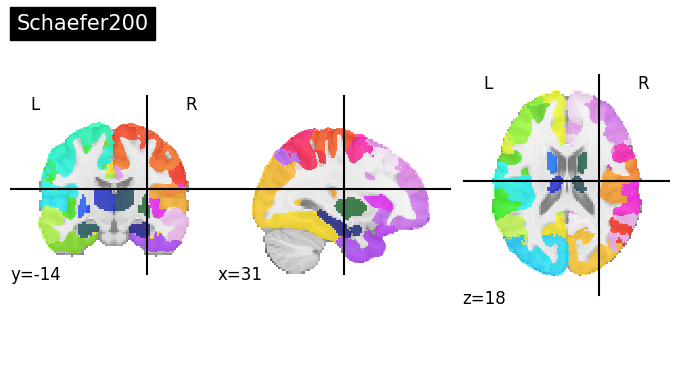

Parcellation: HCP
INFO | 27/09/24 16:36:12 | nispace: Loading parcellation 'HCP' in 'mni152' space.
Type: <class 'nibabel.nifti1.Nifti1Image'>
Space: mni152
First 5 labels: ['1_LH_CX_V1', '2_LH_CX_V2', '3_LH_CX_V3', '4_LH_CX_V4', '5_LH_CX_IPS1']


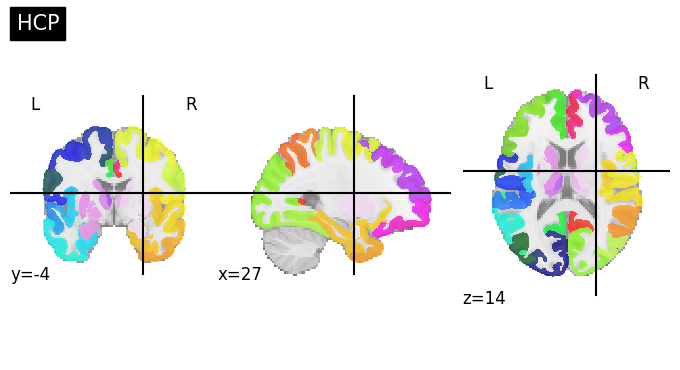

Parcellation: Destrieux
INFO | 27/09/24 16:36:13 | nispace: Loading parcellation 'Destrieux' in 'fsaverage' space.
Type: <class 'tuple'>
Space: fsaverage
First 5 labels: ['1_LH_CX_G_and_S_frontomargin', '2_LH_CX_G_and_S_occipital_inf', '3_LH_CX_G_and_S_paracentral', '4_LH_CX_G_and_S_subcentral', '5_LH_CX_G_and_S_transv_frontopol']
INFO | 27/09/24 16:36:13 | nispace: Loading fsaverage 'pial' template in '10k' resolution.


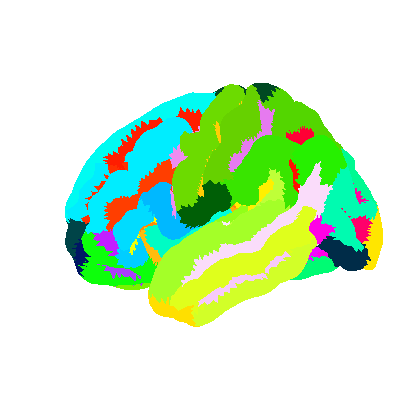

Parcellation: DesikanKilliany
INFO | 27/09/24 16:36:13 | nispace: Loading parcellation 'DesikanKilliany' in 'fsaverage' space.
Type: <class 'tuple'>
Space: fsaverage
First 5 labels: ['1_LH_CX_bankssts', '2_LH_CX_caudalanteriorcingulate', '3_LH_CX_caudalmiddlefrontal', '4_LH_CX_cuneus', '5_LH_CX_entorhinal']
INFO | 27/09/24 16:36:13 | nispace: Loading fsaverage 'pial' template in '10k' resolution.


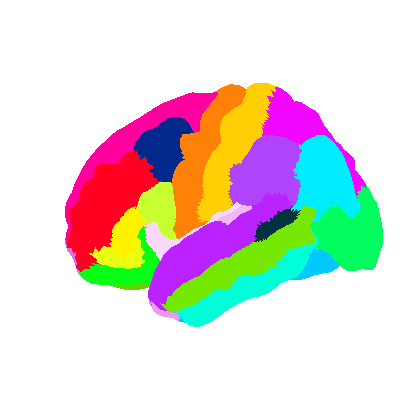

In [10]:
from nispace.datasets import fetch_parcellation
# for plotting
from nispace.datasets import fetch_template
from nilearn.plotting import plot_roi, plot_surf_roi
import matplotlib.pyplot as plt

# Currently available parcellations: Schaefer100, Schaefer200, Schaefer300, HCPex, Destrieux, DesikanKilliany
for parc_name in ["Schaefer200", "HCP", "Destrieux", "DesikanKilliany"]:
    print("Parcellation:", parc_name)
    parc, labels, space = fetch_parcellation(
        parc_name, 
        return_space=True, 
        return_loaded=True
    )
    print("Type:", type(parc))
    print("Space:", space)
    print("First 5 labels:", labels[:5])
    
    # volumetric
    if space == "mni152":
        plot_roi(parc, title=parc_name)
    # surface -> plot only left hemisphere
    else:
        plot_surf_roi(fetch_template("fsagerage", hemi="L"), roi_map=parc[0].agg_data())
    plt.show()

## Fetch example datasets

We include a few example datasets for evaluation and exploration purposes. Available:

- `"happy"` (CAVE: DUMMY DATA): n = 100 fake subjects in two groups. The first 50 are "happy" subjects (sub-001H - sub-050H), generated from CB1 and MU-opioid receptor PET maps. The second half are "neutral"/control subjects, each generated from a mixture of other PET maps. For analyses, they can be treated as two independent groups or two scans of the same subject.  
- `"abide"`: fALFF resting-state fMRI data from the ABIDE-I dataset, fetched from nilearn and parcellated. When fetching this, you will receive an associated table with subject information.  
- `"enigma"`: ENIGMA cortical thickness case-control results. Valued are Cohen's d per parcel.  

In [11]:
from nispace.datasets import fetch_example

print("Happy data")
tab_example = fetch_example("happy")
display(tab_example.head(5))

print("ABIDE data")
tab_example, info_example = fetch_example("abide")
display(tab_example.head(5))
display(info_example.head(5))

print("ENIGMA data")
tab_example = fetch_example("enigma")
display(tab_example)



Happy data
INFO | 27/09/24 16:36:14 | nispace: Loading example dataset: 'happy'. The data was parcellated with: 'Schaefer200'.


,1_RH_SC_aHIP,2_RH_SC_pHIP,3_RH_SC_lAMY,4_RH_SC_mAMY,5_RH_SC_THA-DP,6_RH_SC_THA-VP,7_RH_SC_THA-VA,8_RH_SC_THA-DA,9_RH_SC_NAc-shell,10_RH_SC_NAc-core,...,223_RH_CX_Default_PFCdPFCm_1,224_RH_CX_Default_PFCdPFCm_2,225_RH_CX_Default_PFCdPFCm_3,226_RH_CX_Default_PFCdPFCm_4,227_RH_CX_Default_PFCdPFCm_5,228_RH_CX_Default_PFCdPFCm_6,229_RH_CX_Default_PFCdPFCm_7,230_RH_CX_Default_pCunPCC_1,231_RH_CX_Default_pCunPCC_2,232_RH_CX_Default_pCunPCC_3
sub-001H,-0.693395,-1.114585,0.697538,0.552952,-1.170383,-0.553631,-0.157512,-1.078928,2.332693,1.416655,...,1.134409,1.383432,-0.116278,0.547837,-0.289246,0.958796,0.159359,-0.823691,0.353369,0.523204
sub-002H,-0.673063,-1.005730,0.822947,0.602568,-0.621300,0.163312,0.594892,-0.313779,2.616796,1.736998,...,1.144390,1.339858,-0.018870,0.523604,-0.164901,0.881348,0.206836,-0.820422,0.291698,0.403998
sub-003H,-0.593489,-1.016998,0.863444,0.653698,-0.920228,-0.206172,0.223729,-0.779598,2.620370,1.689086,...,1.248433,1.443596,-0.039270,0.588502,-0.187537,0.915647,0.169156,-0.936913,0.283554,0.452074
sub-004H,-0.458792,-0.859329,0.797210,0.593141,-0.832468,-0.192628,0.198599,-0.746609,2.376633,1.545225,...,1.189499,1.333010,-0.013235,0.571521,-0.133518,0.816552,0.146030,-0.917627,0.219139,0.390520
sub-005H,-0.696454,-1.105904,0.732498,0.557287,-1.058522,-0.378332,0.036105,-0.916961,2.463540,1.541468,...,1.191979,1.417469,-0.092846,0.572604,-0.250572,0.969653,0.180056,-0.864378,0.345299,0.508991


ABIDE data
INFO | 27/09/24 16:36:16 | nispace: Loading example dataset: 'abide'. The data was parcellated with: 'Schaefer200'.
INFO | 27/09/24 16:36:19 | nispace: Returning parcellated and associated subject data.


,1_RH_SC_aHIP,2_RH_SC_pHIP,3_RH_SC_lAMY,4_RH_SC_mAMY,5_RH_SC_THA-DP,6_RH_SC_THA-VP,7_RH_SC_THA-VA,8_RH_SC_THA-DA,9_RH_SC_NAc-shell,10_RH_SC_NAc-core,...,223_RH_CX_Default_PFCdPFCm_1,224_RH_CX_Default_PFCdPFCm_2,225_RH_CX_Default_PFCdPFCm_3,226_RH_CX_Default_PFCdPFCm_4,227_RH_CX_Default_PFCdPFCm_5,228_RH_CX_Default_PFCdPFCm_6,229_RH_CX_Default_PFCdPFCm_7,230_RH_CX_Default_pCunPCC_1,231_RH_CX_Default_pCunPCC_2,232_RH_CX_Default_pCunPCC_3
subject,,,,,,,,,,,,,,,,,,,,,
50003,0.554244,0.545724,0.540651,0.567798,0.565456,0.549855,0.575414,0.547232,0.556550,0.549233,...,0.511879,0.546551,0.572870,0.489960,0.481450,0.548910,0.553655,0.630450,0.624178,0.629993
50004,0.480016,0.507608,0.501729,0.479775,0.497517,0.496894,0.508031,0.504987,0.518331,0.529840,...,0.499219,0.514022,0.495265,0.535245,0.531300,0.530919,0.544821,0.531825,0.549992,0.583247
50005,0.498510,0.525765,0.504602,0.533165,0.526105,0.517529,0.539943,0.543338,0.560928,0.557962,...,0.539904,0.570698,0.539725,0.570238,0.521150,0.535021,0.549574,0.590597,0.604462,0.599347
50006,0.521442,0.536580,0.508965,0.523906,0.534811,0.522690,0.525827,0.522897,0.535364,0.525703,...,0.553780,0.543042,0.518454,0.561790,0.522045,0.552814,0.528958,0.580796,0.581530,0.590443
50007,0.540955,0.565601,0.538194,0.572868,0.570920,0.538686,0.572898,0.567324,0.581634,0.585195,...,0.584967,0.598638,0.561605,0.603095,0.533502,0.589898,0.550674,0.575307,0.609521,0.621164


,site,site_num,dx,dx_num,dsm_iv_tr,age,sex,sex_num,qc_rater_1,qc_func_rater_2,qc_func_rater_3,adi_r_social_total_a,adi_r_verbal_total_bv,adi_rrb_total_c,ados_total,srs_raw_total,scq_total,aq_total
subject,,,,,,,,,,,,,,,,,,
50003,PITT,9,ASD,1,1.0,24.45,M,1,OK,OK,OK,27.0,22.0,5.0,13.0,NaN,NaN,NaN
50004,PITT,9,ASD,1,1.0,19.09,M,1,OK,OK,OK,19.0,12.0,5.0,18.0,NaN,NaN,NaN
50005,PITT,9,ASD,1,1.0,13.73,F,2,OK,maybe,OK,23.0,19.0,3.0,12.0,NaN,NaN,NaN
50006,PITT,9,ASD,1,1.0,13.37,M,1,OK,maybe,OK,13.0,10.0,4.0,12.0,NaN,NaN,NaN
50007,PITT,9,ASD,1,1.0,17.78,M,1,OK,maybe,OK,21.0,14.0,9.0,17.0,NaN,NaN,NaN


ENIGMA data
INFO | 27/09/24 16:36:22 | nispace: Loading example dataset: 'enigma'. The data was parcellated with: 'DesikanKilliany'.


,L_bankssts,L_caudalanteriorcingulate,L_caudalmiddlefrontal,L_cuneus,L_entorhinal,L_fusiform,L_inferiorparietal,L_inferiortemporal,L_isthmuscingulate,L_lateraloccipital,...,R_rostralanteriorcingulate,R_rostralmiddlefrontal,R_superiorfrontal,R_superiorparietal,R_superiortemporal,R_supramarginal,R_frontalpole,R_temporalpole,R_transversetemporal,R_insula
MDD,-0.058,-0.042,-0.014,0.047,-0.041,-0.117,-0.063,-0.049,-0.104,-0.023,...,-0.098,-0.038,-0.078,0.032,-0.031,-0.053,-0.062,0.013,-0.051,-0.115
PTSD,-0.100,-0.100,-0.120,-0.070,0.050,-0.060,-0.140,-0.070,-0.020,-0.150,...,0.010,-0.100,-0.120,-0.120,-0.140,-0.150,-0.100,-0.020,-0.050,-0.110
AN,-0.738,-0.065,-0.760,-0.663,0.060,-0.538,-0.895,-0.537,-0.620,-0.747,...,-0.003,-0.507,-0.722,-0.925,-0.522,-0.756,-0.332,-0.055,-0.258,-0.339
ADHD,0.000,-0.040,-0.050,0.020,-0.080,-0.100,0.010,-0.030,0.030,0.030,...,-0.010,0.000,0.000,0.010,0.000,-0.020,0.010,-0.120,0.010,-0.050
ASD,0.000,0.020,0.050,0.060,-0.150,NaN,0.010,-0.050,0.020,-0.010,...,0.090,0.220,0.200,-0.040,-0.050,-0.080,0.090,-0.150,-0.130,-0.100
OCD,-0.060,0.003,-0.090,-0.042,-0.062,-0.109,-0.140,-0.087,-0.068,-0.074,...,0.005,-0.091,-0.038,-0.047,0.014,0.003,0.021,0.015,-0.024,-0.065
BD,-0.207,-0.095,-0.266,-0.056,-0.036,-0.288,-0.265,-0.250,-0.132,-0.156,...,-0.087,-0.264,-0.256,-0.158,-0.194,-0.184,-0.102,-0.059,-0.109,-0.168
SCZ,-0.352,-0.119,-0.363,-0.203,-0.203,-0.491,-0.362,-0.449,-0.309,-0.331,...,-0.120,-0.313,-0.397,-0.219,-0.438,-0.386,-0.207,-0.236,-0.262,-0.406
22q11.2,-0.030,-0.210,0.510,0.520,0.160,0.190,0.250,0.280,0.300,0.220,...,0.160,0.800,0.530,0.300,-0.320,0.710,0.140,0.010,0.060,0.630
Epilepsy - all,-0.092,0.039,-0.319,-0.157,-0.264,-0.187,-0.197,-0.085,-0.049,-0.190,...,0.093,-0.197,-0.269,-0.313,-0.123,-0.223,-0.109,-0.181,-0.182,-0.022
